In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica_ensamble as sle


# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [2]:
df = pd.read_pickle('../datos/df_encoded.pkl').reset_index(drop=True) # importo mi modelo más importante
df.head()

,Age_robust,Attrition,DistanceFromHome_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,...,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,1.153846,0,-0.083333,1.495430,-0.333333,-0.500000,-1.000000,-0.666667,-0.333333,-0.6,...,0.150606,0.149349,0.169076,0.142450,0.126116,0.057223,0.139531,0.112259,0.186013,0.155515
1,-0.384615,1,0.250000,-0.136563,-0.666667,1.500000,-0.444444,0.000000,0.000000,0.2,...,0.253988,0.155722,0.170456,0.187458,0.250556,0.175960,0.143672,0.160661,0.171167,0.163491
2,-0.307692,0,0.833333,2.631079,-0.333333,0.166667,-0.555556,0.000000,-0.333333,0.0,...,0.253988,0.155722,0.110225,0.172084,0.124242,0.172379,0.149717,0.160661,0.319268,0.152888
3,0.153846,0,-0.416667,0.618830,0.333333,-0.500000,0.333333,0.500000,2.000000,0.4,...,0.077491,0.156102,0.160580,0.134043,0.124242,0.147694,0.127563,0.116974,0.145384,0.163018
4,-0.307692,0,0.250000,-0.474223,0.666667,-0.333333,-0.111111,0.166667,-0.333333,0.2,...,0.149360,0.155841,0.165907,0.177812,0.258805,0.170352,0.138802,0.224400,0.146153,0.150490


In [30]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_logreg = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_logreg.head().T

,train,test
accuracy,0.843634,0.856492
precision,0.845077,0.855034
recall,0.843634,0.856492
f1,0.780779,0.802787
kappa,0.078708,0.125014
auc,0.766153,0.789273
time_seconds,0.002190,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.002190
nucleos_usados,NaN,NaN


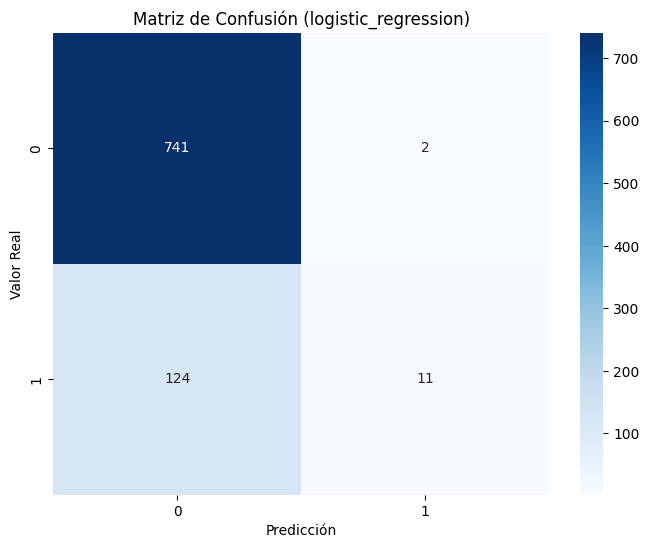

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Metricas\..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


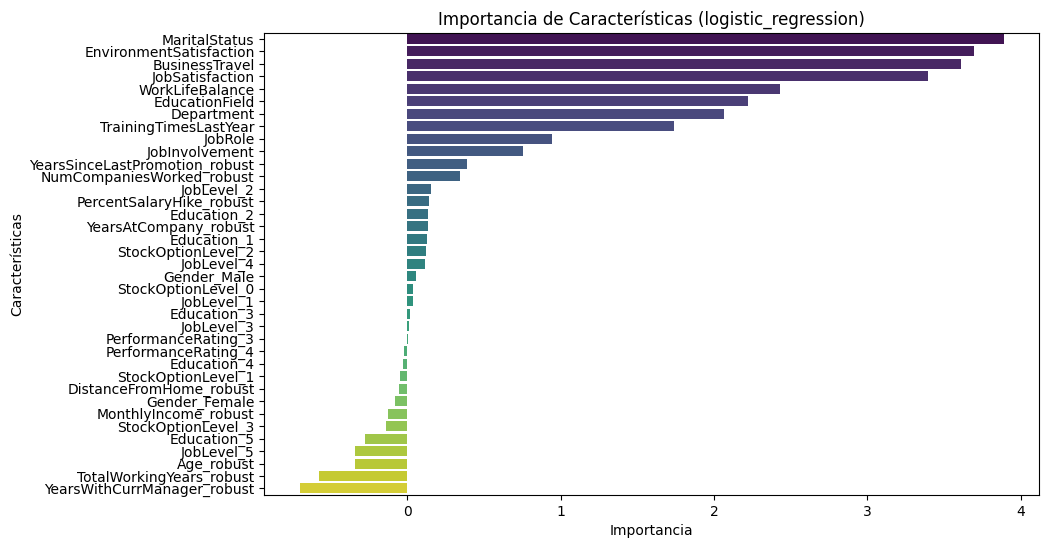

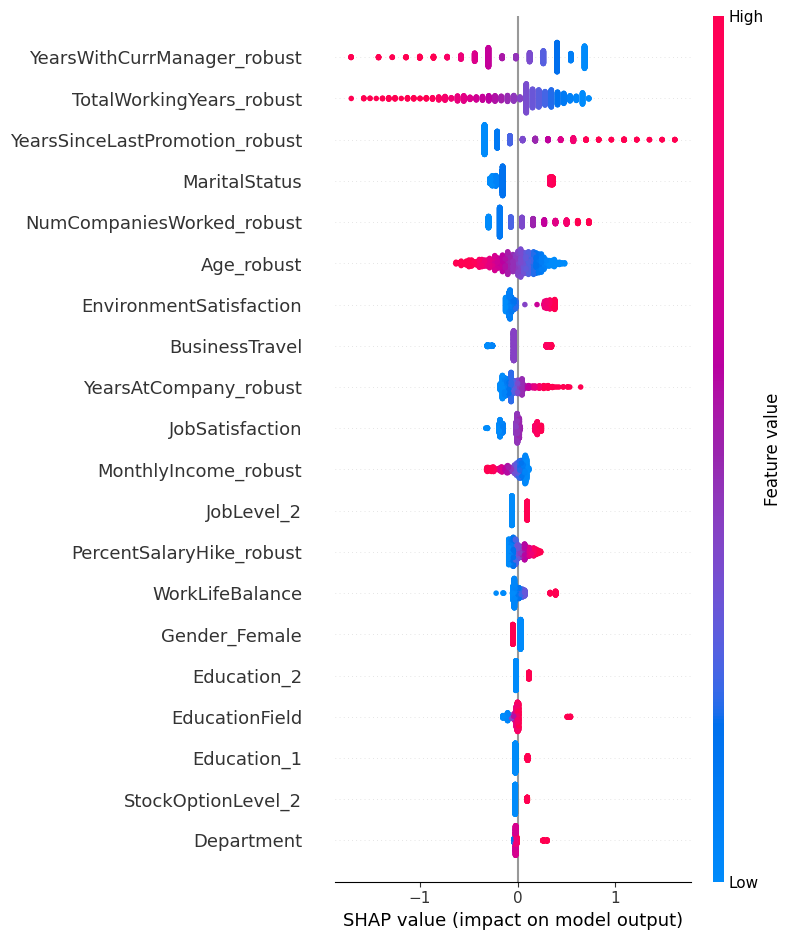

In [31]:
logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression') 
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

## Observaciones: pendiente

LogisticRegression(random_state=42)
{'logistic_regression': {'mejor_modelo': LogisticRegression(random_state=42), 'pred_train': array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 'pred_test': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0

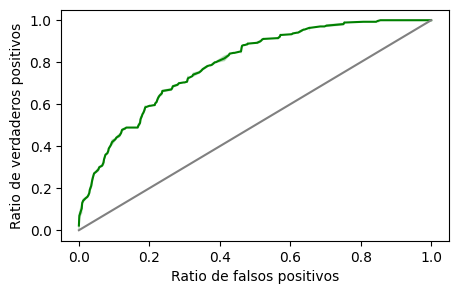

In [35]:
logistica.graficar_roc('logistic_regression')

# Random Forest

In [36]:
params_random =     {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

In [37]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

# llamamos al metodo para obtener los resultaods de las predicciones
df_random = logistica.calcular_metricas(modelo_nombre =  "random_forest")
df_random.head()

El mejor modelo es RandomForestClassifier(max_depth=16, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.999715,0.999715,0.999715,0.999715,0.998956,1.000000,0.079893,-1.0,NaN,NaN
test,0.953303,0.955745,0.953303,0.949750,0.795096,0.989053,NaN,NaN,0.079893,-1.0


In [38]:
logistica.resultados["random_forest"]["mejor_modelo"]

RandomForestClassifier(max_depth=16, n_jobs=-1)

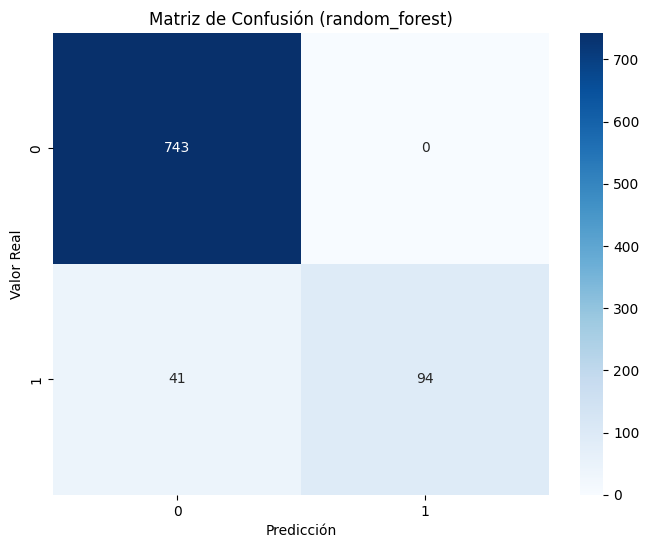

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Metricas\..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


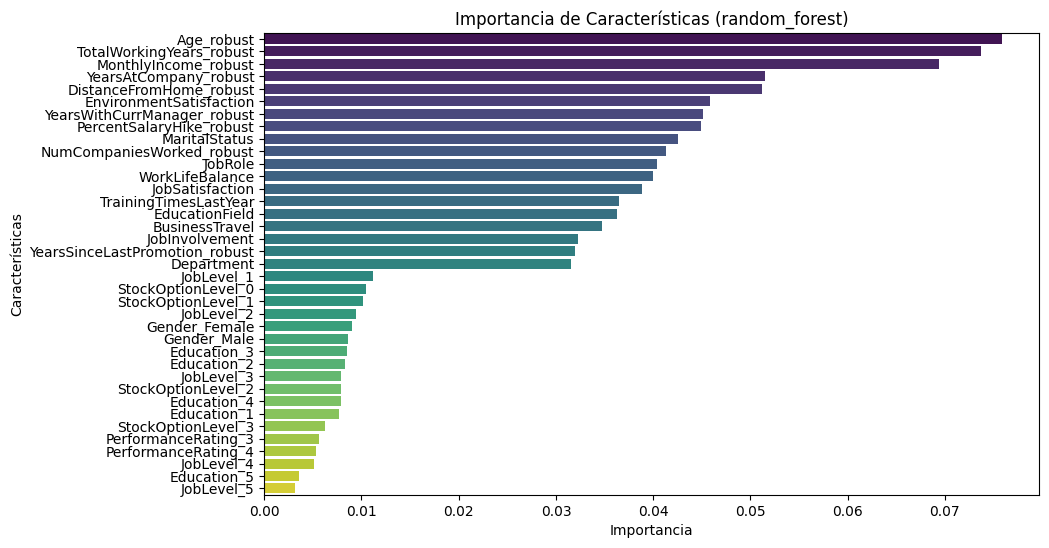

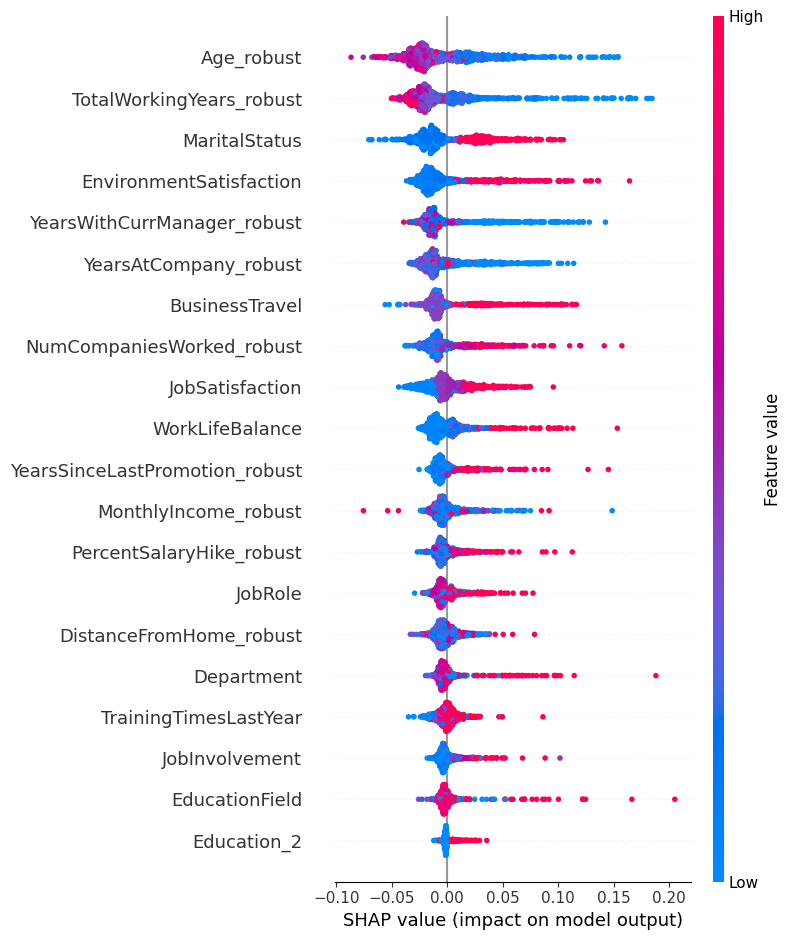

In [39]:
logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest') 
logistica.plot_shap_summary(modelo_nombre="random_forest")

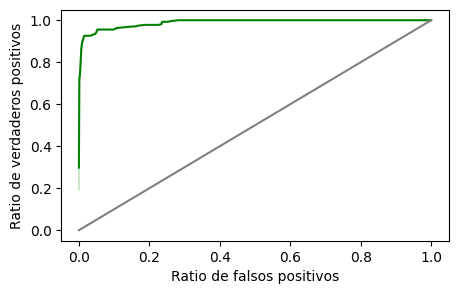

In [40]:
logistica.graficar_roc('random_forest')

## Decision Tree

In [41]:
params_grid_tree = {
                'max_depth': [9,10,12,15],
                'min_samples_split': [4,5,6],
                'min_samples_leaf': [1, 2, 4]
}

In [42]:
logistica.ajustar_modelo("tree", param_grid=params_grid_tree) # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_dectree = logistica.calcular_metricas(modelo_nombre =  "tree")
df_dectree.head().T

El mejor modelo es DecisionTreeClassifier(max_depth=12, min_samples_split=4)


,train,test
accuracy,0.963258,0.896355
precision,0.963124,0.889263
recall,0.963258,0.896355
f1,0.961986,0.891111
kappa,0.856511,0.563346
auc,0.963627,0.811610
time_seconds,0.003000,NaN
n_jobs,8.000000,NaN
tiempo_computacion(segundos),NaN,0.003000
nucleos_usados,NaN,8.000000


In [43]:
logistica.resultados["tree"]["mejor_modelo"]

DecisionTreeClassifier(max_depth=12, min_samples_split=4)

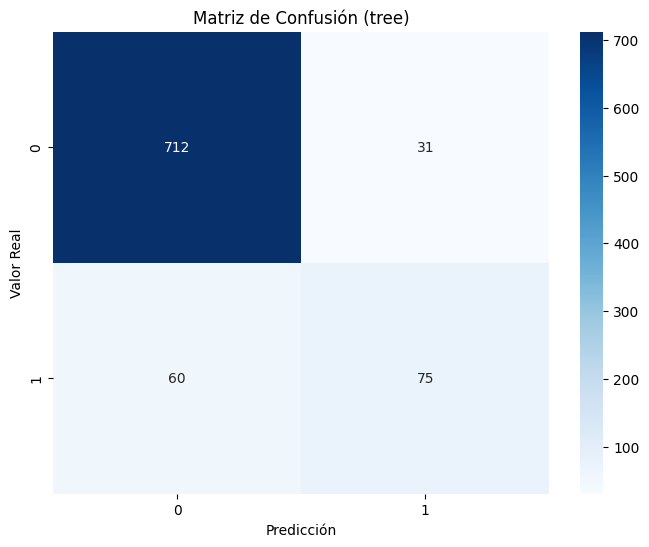

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Metricas\..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


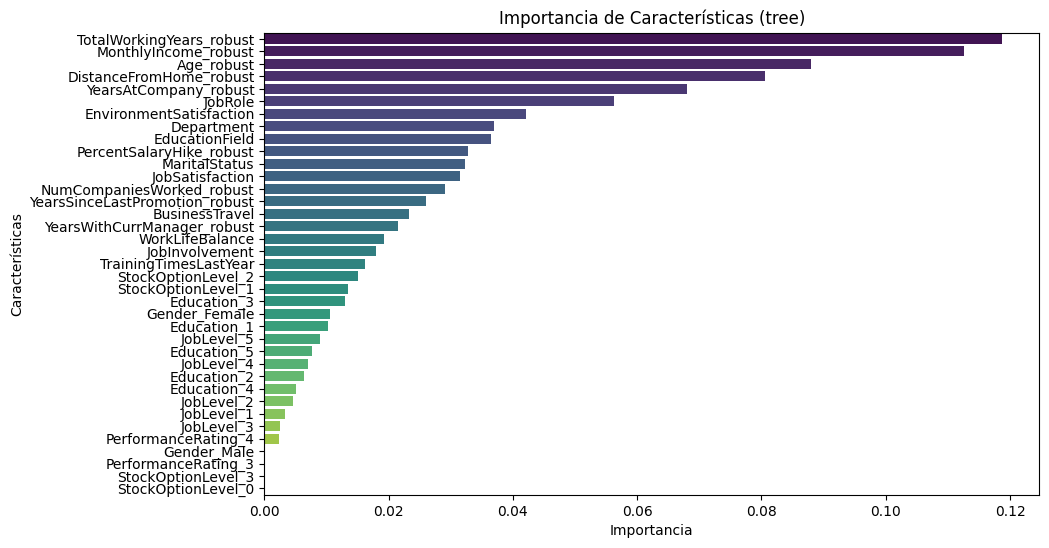

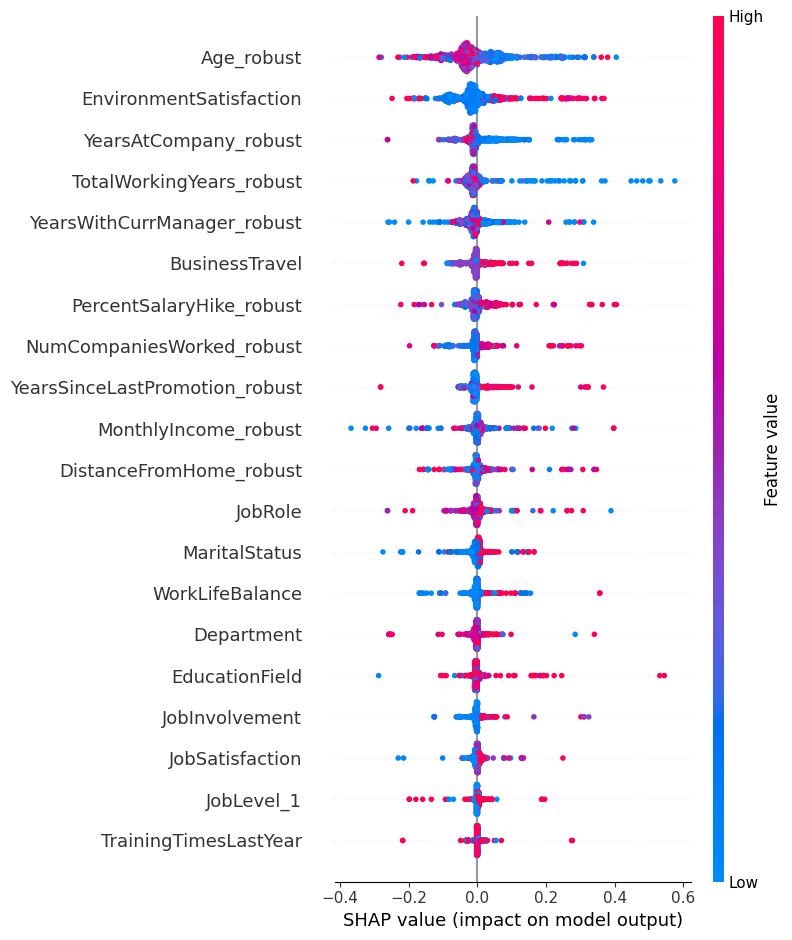

In [44]:
logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree') 
logistica.plot_shap_summary(modelo_nombre="tree")

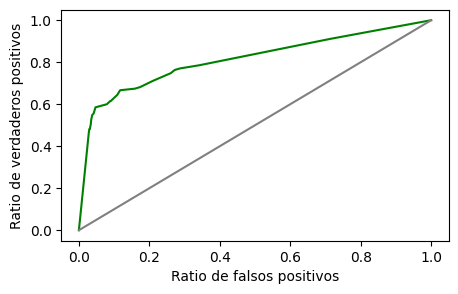

In [45]:
logistica.graficar_roc('tree')

## Gradient Booster

In [46]:
logistica.ajustar_modelo("gradient_boosting", param_grid=params_grid_tree) # aqui le paso los parametros que yo quiera usarles

# llamamos al metodo para obtener los resultaods de las predicciones
df_grad = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting")
df_grad.head().T

El mejor modelo es GradientBoostingClassifier(max_depth=12, min_samples_leaf=4,
                           min_samples_split=6)


,train,test
accuracy,1.000000,0.986333
precision,1.000000,0.986408
recall,1.000000,0.986333
f1,1.000000,0.986115
kappa,1.000000,0.945839
auc,1.000000,0.998475
time_seconds,0.050082,NaN
n_jobs,8.000000,NaN
tiempo_computacion(segundos),NaN,0.050082
nucleos_usados,NaN,8.000000


In [47]:
logistica.resultados["gradient_boosting"]["mejor_modelo"]

GradientBoostingClassifier(max_depth=12, min_samples_leaf=4,
                           min_samples_split=6)

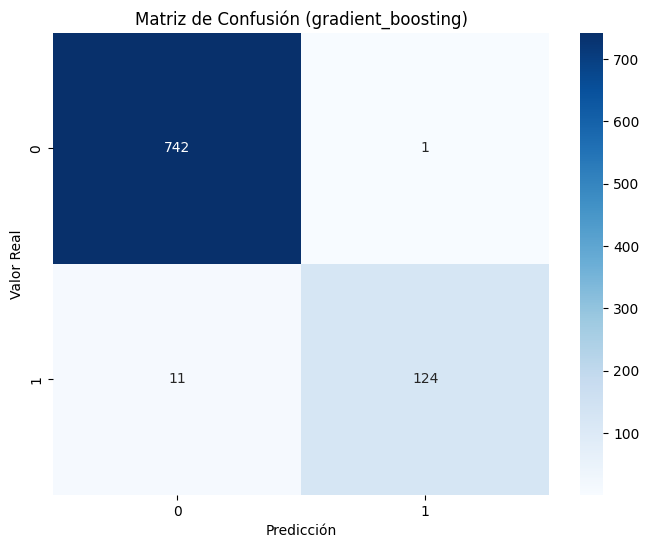

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Metricas\..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


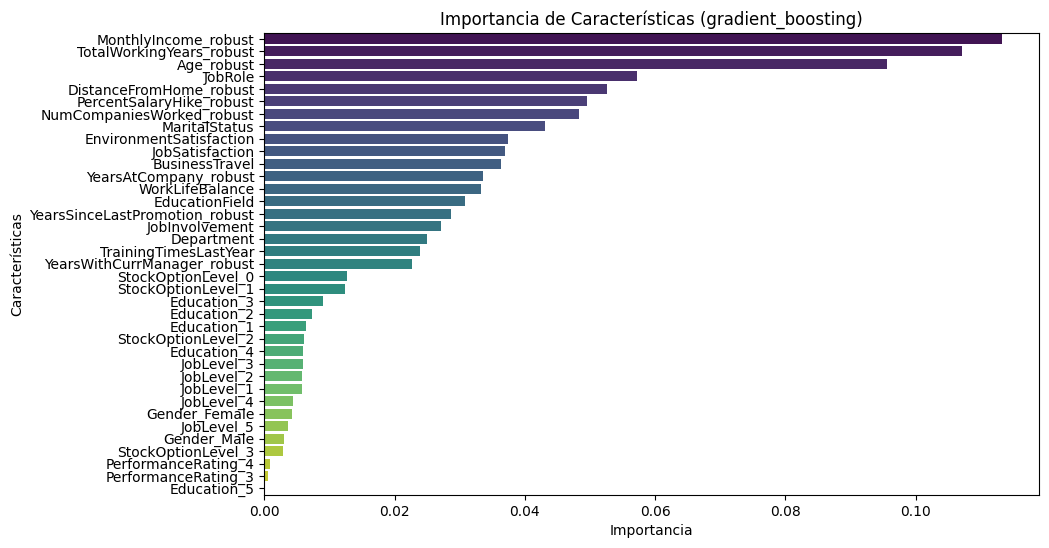

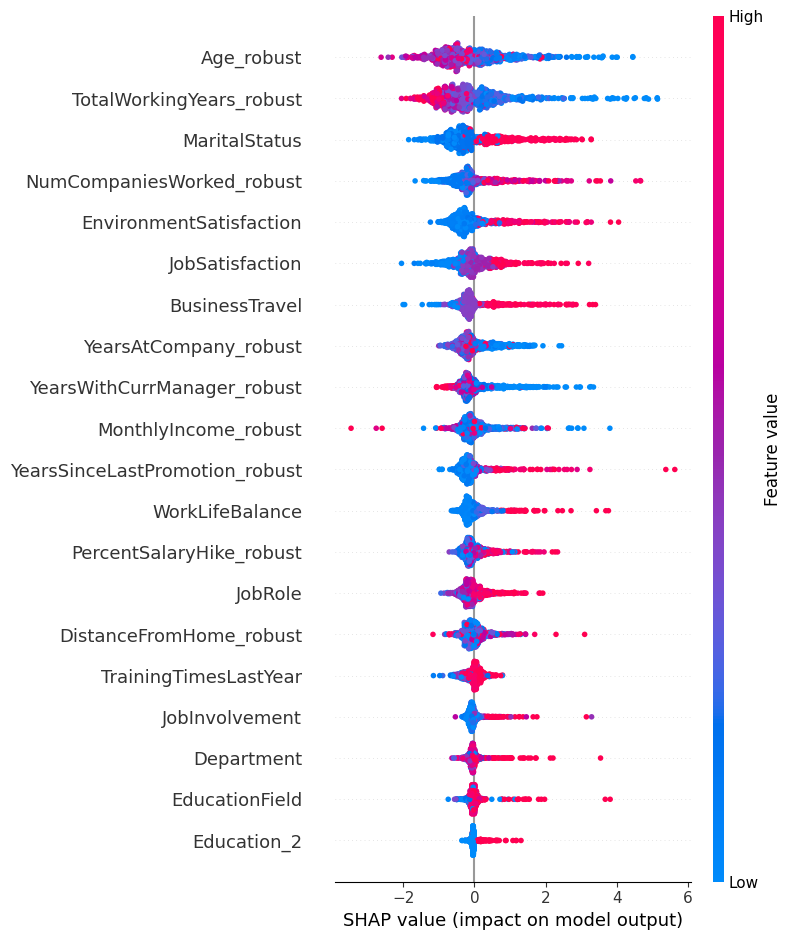

In [48]:
logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting') 
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")

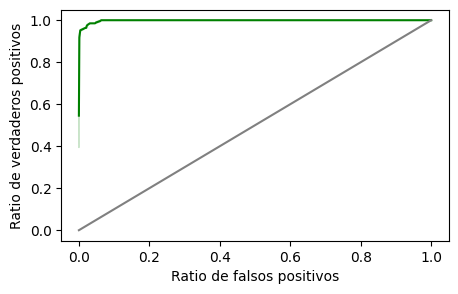

In [50]:
logistica.graficar_roc('gradient_boosting')